In [1]:
import pandas as pd
wine = pd.read_csv("https://bit.ly/wine-date")
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [2]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [3]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [4]:
data=wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

In [5]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = train_test_split(data,target,test_size=0.2,random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

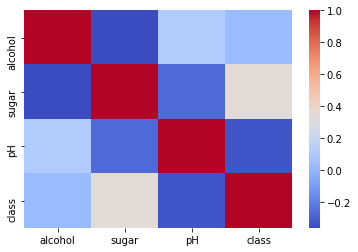

In [30]:
import seaborn as sns
corr = wine.iloc[:,0:4].corr()
corr
display(sns.heatmap(corr,cmap="coolwarm"))

In [7]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled,test_target))

0.7808350971714451
0.7776923076923077


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np
#모델5개

In [9]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)#10개 split사용

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
pipe=make_pipeline(StandardScaler(),sgd)
scores = cross_validate(pipe,data,target,cv=10,return_train_score=True)
print(scores)
print(np.mean(scores['test_score']))
print(np.mean(scores['train_score']))

{'fit_time': array([0.00632334, 0.00522757, 0.0051322 , 0.00518084, 0.00478697,
       0.00523114, 0.00658369, 0.00490212, 0.00959682, 0.00529909]), 'score_time': array([0.02627611, 0.02723837, 0.02697968, 0.02716112, 0.02632213,
       0.02811837, 0.03289557, 0.02657795, 0.03516507, 0.03000259]), 'test_score': array([0.83692308, 0.85846154, 0.8       , 0.84      , 0.86615385,
       0.83538462, 0.79538462, 0.85208012, 0.86440678, 0.85824345]), 'train_score': array([0.87514965, 0.87292629, 0.87720198, 0.87446554, 0.87429451,
       0.87343937, 0.8797674 , 0.87893297, 0.874487  , 0.87739398])}
0.8407038046699065
0.8758058694381138


In [13]:
clf = KNeighborsClassifier(n_neighbors = 13)#최근접이웃 13개
scoring = 'accuracy'
score = cross_val_score(clf, data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)#10번

[0.87384615 0.89384615 0.86923077 0.84769231 0.85076923 0.83076923
 0.88       0.8844376  0.85670262 0.86748844]


In [14]:
round(np.mean(score)*100, 2)

86.55

In [15]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.87538462 0.87384615 0.87846154 0.87230769 0.85692308 0.86769231
 0.88       0.88289676 0.87211094 0.86748844]


In [16]:
round(np.mean(score)*100, 2)

87.27

In [17]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.89230769 0.92461538 0.88153846 0.89846154 0.87538462 0.88615385
 0.91692308 0.90446841 0.89368259 0.88289676]


In [18]:
round(np.mean(score)*100, 2)

89.56

In [19]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.78769231 0.79230769 0.80769231 0.76615385 0.76615385 0.75846154
 0.78923077 0.78120185 0.77812018 0.77966102]


In [20]:
round(np.mean(score)*100, 2)

78.07

In [21]:
clf = SVC() 
scoring = 'accuracy'
score = cross_val_score(clf, data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.84769231 0.86615385 0.85846154 0.82615385 0.81692308 0.82923077
 0.85230769 0.85362096 0.85516179 0.86594761]


In [22]:
round(np.mean(score)*100,2)

84.72

In [24]:
clf = RandomForestClassifier()
clf.fit(data, target)

prediction = clf.predict(test_input)
print(prediction)

[1. 0. 1. ... 1. 1. 1.]


In [25]:
print(clf.feature_importances_)

[0.22481215 0.5029773  0.27221056]


In [26]:
submission = pd.DataFrame({
        "whitewine": prediction,
    })

submission.to_csv('submission.csv', index=False)

In [27]:
print(test_input[:5])

[[12.2  12.8   3.26]
 [ 9.9   2.2   3.27]
 [12.    7.4   3.18]
 [ 9.5  11.2   3.12]
 [ 8.9  13.9   3.11]]


In [28]:
print(test_input[1295:1300])

[[ 9.3   6.6   3.22]
 [ 9.3   1.1   3.13]
 [12.4   1.8   3.19]
 [ 9.4   9.7   3.3 ]
 [ 8.7  15.5   2.9 ]]


In [29]:
submission = pd.read_csv('submission.csv')
submission.head(1300)

,whitewine
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
1295,0.0
1296,1.0
1297,1.0
1298,1.0
